<a href="https://colab.research.google.com/github/syedhussain07/Python-Code-for-Project/blob/main/Preprocessing_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Startup_Funding_Cleaned.csv'
data = pd.read_csv(file_path)
data['Date dd/mm/yyyy'] = data['Date dd/mm/yyyy'].str.replace(r'([0-9]{2})/([0-9]{2})([0-9]{4})', r'\1/\2/\3')

# Extracting 'Year' and 'Month' from 'Date dd/mm/yyyy'
data['Year'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.year
data['Month'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.month

# Saving the intermediate file
data.to_csv('/content/data_with_date_transformed.csv', index=False)

from sklearn.preprocessing import StandardScaler

# Removing commas and converting 'Amount in USD' to numeric, handling non-numeric values as NaN
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'].str.replace(',', ''), errors='coerce')

# Filling NaN values with the median
median_amount = data['Amount in USD'].median()
data['Amount in USD'].fillna(median_amount, inplace=True)

# Normalizing 'Amount in USD'
scaler = StandardScaler()
data['Amount in USD'] = scaler.fit_transform(data[['Amount in USD']])

# Saving the intermediate file
data.to_csv('/content/data_with_normalized_amount.csv', index=False)
from sklearn.preprocessing import OneHotEncoder

# Encoding Categorical Variables
categorical_columns = ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name']
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = onehot_encoder.fit_transform(data[categorical_columns])

# Creating a new DataFrame from the encoded data
encoded_categorical_df = pd.DataFrame(encoded_categorical_data,
                                      columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Combining the encoded data with the original dataset
preprocessed_data = pd.concat([data.drop(categorical_columns, axis=1), encoded_categorical_df], axis=1)

# Saving the final preprocessed file
preprocessed_data.to_csv('/content/final_preprocessed_data.csv', index=False)



<ipython-input-5-6ca4ee4fd837>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Date dd/mm/yyyy'] = data['Date dd/mm/yyyy'].str.replace(r'([0-9]{2})/([0-9]{2})([0-9]{4})', r'\1/\2/\3')
<ipython-input-5-6ca4ee4fd837>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Year'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.year
<ipython-input-5-6ca4ee4fd837>:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.month
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in versio

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
file_path = '/content/Startup_Funding_Cleaned.csv'
data = pd.read_csv(file_path)

# Remove 'Remarks' column
data = data.drop('Remarks', axis=1)

# Fixing any date format issues and extracting year and month
data['Date dd/mm/yyyy'] = data['Date dd/mm/yyyy'].str.replace(r'([0-9]{2})/([0-9]{2})([0-9]{4})', r'\1/\2/\3')
data['Year'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.year
data['Month'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.month

# Normalizing 'Amount in USD' and storing in a new column
data['Amount in USD'] = pd.to_numeric(data['Amount in USD'].str.replace(',', ''), errors='coerce')
median_amount = data['Amount in USD'].median()
data['Amount in USD'].fillna(median_amount, inplace=True)
scaler = StandardScaler()
data['Normalized Amount in USD'] = scaler.fit_transform(data[['Amount in USD']])

# Encoding Categorical Variables
categorical_columns = ['Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name']
onehot_encoder = OneHotEncoder(sparse=False)
encoded_categorical_data = onehot_encoder.fit_transform(data[categorical_columns])
encoded_categorical_df = pd.DataFrame(encoded_categorical_data, columns=onehot_encoder.get_feature_names_out(categorical_columns))

# Combining the encoded data with the original dataset
preprocessed_data = pd.concat([data.drop(categorical_columns, axis=1), encoded_categorical_df], axis=1)

# Saving the final preprocessed file
preprocessed_data.to_csv('/content/startup_funding_preprocessed.csv', index=False)


<ipython-input-1-11e8b7c6e42e>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Date dd/mm/yyyy'] = data['Date dd/mm/yyyy'].str.replace(r'([0-9]{2})/([0-9]{2})([0-9]{4})', r'\1/\2/\3')
<ipython-input-1-11e8b7c6e42e>:13: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Year'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.year
<ipython-input-1-11e8b7c6e42e>:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Month'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce').dt.month
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in vers

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Startup_Funding_Cleaned.csv'
data_cleaning = pd.read_csv(file_path)

# Data cleaning steps here (e.g., handling missing values, incorrect formats)
# Assuming 'Date dd/mm/yyyy' column has some formatting issues to be cleaned
data_cleaning['Date dd/mm/yyyy'] = data_cleaning['Date dd/mm/yyyy'].str.replace(r'([0-9]{2})/([0-9]{2})([0-9]{4})', r'\1/\2/\3', regex=True)

# Save the cleaned data
data_cleaning.to_csv('/content/data_cleaned.csv', index=False)


In [ ]:
# Load the integrated data
import pandas as pd

data_reduction = pd.read_csv('/content/data_cleaned.csv')

# Example of data reduction (dropping columns or rows that are not needed)
# Dropping the 'Remarks' column as it's not needed
data_reduction.drop('Remarks', axis=1, inplace=True)

# Save the reduced data
data_reduction.to_csv('/content/data_reduced.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the reduced data
data_transformation = pd.read_csv('/content/data_reduced.csv')

# Data transformation steps (e.g., normalization, encoding)
# Normalizing 'Amount in USD' and storing in a new column
data_transformation['Amount in USD'] = pd.to_numeric(data_transformation['Amount in USD'].str.replace(',', ''), errors='coerce')
median_amount = data_transformation['Amount in USD'].median()
data_transformation['Amount in USD'].fillna(median_amount, inplace=True)

scaler = StandardScaler()
data_transformation['Normalized Amount in USD'] = scaler.fit_transform(data_transformation[['Amount in USD']])

# Save the transformed data
data_transformation.to_csv('/content/data_transformed.csv', index=False)


In [ ]:
import pandas as pd
data_discretization = pd.read_csv('/content/data_transformed.csv')

# Data discretization steps (e.g., binning a continuous variable)
# Assuming 'Normalized Amount in USD' follows a roughly normal distribution, we can set thresholds
low_threshold = data_discretization['Normalized Amount in USD'].quantile(0.33)  # Adjust the quantile for your specific needs
high_threshold = data_discretization['Normalized Amount in USD'].quantile(0.66)

# Create a new column with 'Low', 'Medium', 'High' based on thresholds
conditions = [
    (data_discretization['Normalized Amount in USD'] <= low_threshold),
    (data_discretization['Normalized Amount in USD'] > low_threshold) & (data_discretization['Normalized Amount in USD'] <= high_threshold),
    (data_discretization['Normalized Amount in USD'] > high_threshold)
]

# Define the labels for the discretization
labels = ['Low', 'Medium', 'High']

data_discretization['Discretized Amount in USD'] = pd.cut(data_discretization['Normalized Amount in USD'], bins=[-float('inf'), low_threshold, high_threshold, float('inf')], labels=labels)

# Save the discretized data
data_discretization.to_csv('/content/data_discretized.csv', index=False)


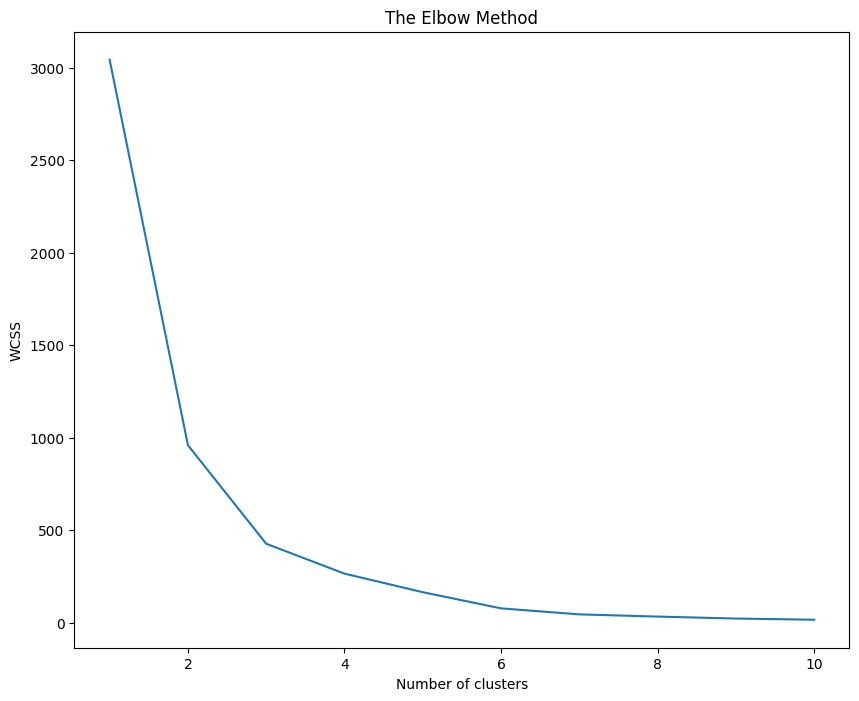

OSError: ignored

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# Select the 'Normalized Amount in USD' for K-Means clustering
features = data[['Normalized Amount in USD']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the K-Means model using the optimal number of clusters
optimal_k = 3  # Replace with the actual number from the elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original dataframe
data['KMeans_Cluster'] = clusters

# Save the dataframe with cluster labels
data.to_csv('CONTENT/data_with_kmeans_clusters.csv', index=False)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 0], c=clusters, cmap='viridis')  # Using the same feature since we have only one
plt.title('K-Means Clustering')
plt.xlabel('Normalized Amount in USD')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


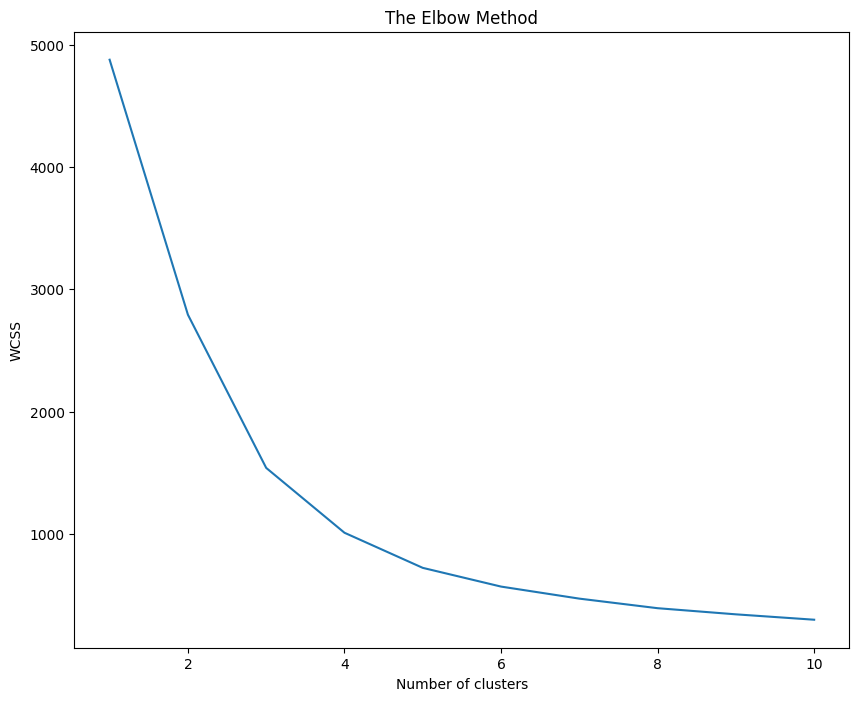

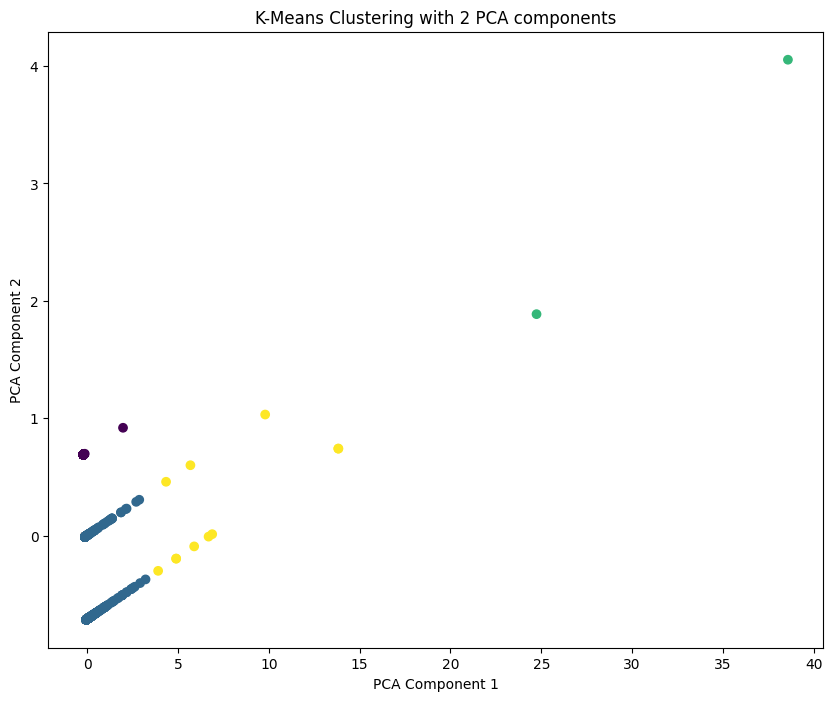

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# One-hot encode the 'Investment Type' categorical variable
onehot_encoder = OneHotEncoder(sparse=False)
investment_type_encoded = onehot_encoder.fit_transform(data[['InvestmentnType']])

# Standardize the 'Amount in USD' column if it's not already normalized
scaler = StandardScaler()
amount_scaled = scaler.fit_transform(data[['Normalized Amount in USD']])

# Combine the encoded categorical data with the scaled 'Amount in USD' data
features = np.hstack((amount_scaled, investment_type_encoded))

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# The elbow point on the plot indicates the optimal number of clusters
optimal_k = 4  # Example, replace with the actual number obtained from the elbow method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(features)

# Save the dataframe with cluster labels to a new CSV file
# data.to_csv('path_to_your_file/data_with_kmeans_clusters.csv', index=False)

# Visualizing the clusters might require dimensionality reduction due to the high-dimensional feature space
# Here's an example using PCA to reduce the data to two dimensions for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features)

# Visualizing the reduced data
plt.figure(figsize=(10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster_Labels'], cmap='viridis')
plt.title('K-Means Clustering with 2 PCA components')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# Select two features for K-Means clustering
# Assuming 'Normalized Amount in USD' is one feature and one-hot encoding has been done for 'Industry Vertical'
# Replace 'OneHotFeature1' with the actual column name from one-hot encoding
features = data[['Normalized Amount in USD', 'InvestmentnType']]
num_clusters = 3

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Get cluster labels and centroids
data['Cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Calculate cluster statistics
cluster_stats = data.groupby('Cluster').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

# Visualizing the clusters in 2D
plt.figure(figsize=(10, 8))
plt.scatter(data['Normalized Amount in USD'], data['OneHotFeature1'], c=data['Cluster'], cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('K-Means Clustering with 2 Features')
plt.xlabel('Normalized Amount in USD')
plt.ylabel('InvestmentnType')
plt.legend()
plt.show()


ValueError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-17-679f7748649f>:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = data.groupby('Cluster').mean().reset_index()


Cluster Statistics:
   Cluster        Sr No  Amount in USD  Normalized Amount in USD  \
0        0  1552.442510   2.618320e+06                 -0.104051   
1        1   652.000000   2.500000e+09                 24.807757   
2        2  1333.000000   6.412500e+08                  6.266409   
3        3    61.000000   3.900000e+09                 38.772995   
4        4   899.000000   1.400000e+09                 13.835070   
5        5   662.545455   2.329545e+08                  2.193592   
6        6  1198.758621   1.038172e+08                  0.905426   
7        7  1313.644330   3.475221e+07                  0.216490   
8        8    32.000000   1.000000e+09                  9.845001   
9        9  1895.000000   4.625000e+08                  4.483347   

   InvestmentnType_Angel  InvestmentnType_Angel / Seed Funding  \
0               0.000363                              0.002902   
1               0.000000                              0.000000   
2               0.000000         

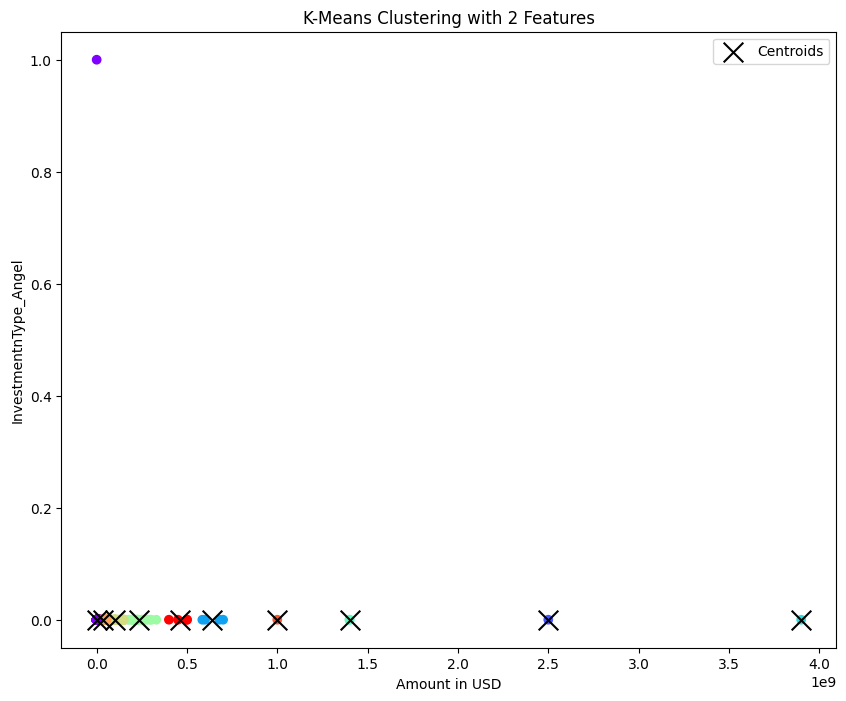

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# One-hot encode the 'InvestmentnType' categorical variable
onehot_encoder = OneHotEncoder(sparse=False)
investment_type_encoded = onehot_encoder.fit_transform(data[['InvestmentnType']])

# Adding the one-hot encoded features to the DataFrame
encoded_feature_names = onehot_encoder.get_feature_names_out(['InvestmentnType'])
for i, feature_name in enumerate(encoded_feature_names):
    data[feature_name] = investment_type_encoded[:, i]

# Select 'Normalized Amount in USD' and the one-hot encoded 'InvestmentnType' features for K-Means clustering
selected_features = ['Amount in USD'] + list(encoded_feature_names)
features = data[selected_features]

# Perform K-Means clustering
num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(features)

# Get cluster labels and centroids
data['Cluster'] = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Calculate cluster statistics
cluster_stats = data.groupby('Cluster').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

# Visualizing the clusters in a 2D plot using 'Normalized Amount in USD' and the first one-hot encoded 'InvestmentnType' feature
plt.figure(figsize=(10, 8))
plt.scatter(data['Amount in USD'], data[encoded_feature_names[0]], c=data['Cluster'], cmap='rainbow')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, c='black', marker='x', label='Centroids')
plt.title('K-Means Clustering with 2 Features')
plt.xlabel('Amount in USD')
plt.ylabel(encoded_feature_names[0])
plt.legend()
plt.show()


In [ ]:
pip install kmodes


  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)


In [ ]:
pip install scikit-learn-extra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 1 is empty! self.labels_[self.medoid_indices_[1]] may not be labeled with its corresponding cluster (1).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn_extra/cluster/_k_medoids.py:329: UserWarning: Cluster 2 is empty! self.labels_[self.medoid_indices_[2]] may not be labeled with its corresponding cluster (2).
  warnings.warn(
<ipython-input-30-84e62ced291f>:28: FutureWarning: ['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType', 'Discretized Amount in USD'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  cluster_stats = data.groupby('Cluster').agg(['mean', 'median', 'std'])


          Sr No                     Amount in USD                           \
           mean  median         std          mean     median           std   
Cluster                                                                      
0        1522.5  1522.5  878.871435  1.304929e+07  1700000.0  1.002654e+08   

        Normalized Amount in USD                      
                            mean    median       std  
Cluster                                               
0                   2.987098e-17 -0.113211  1.000164  


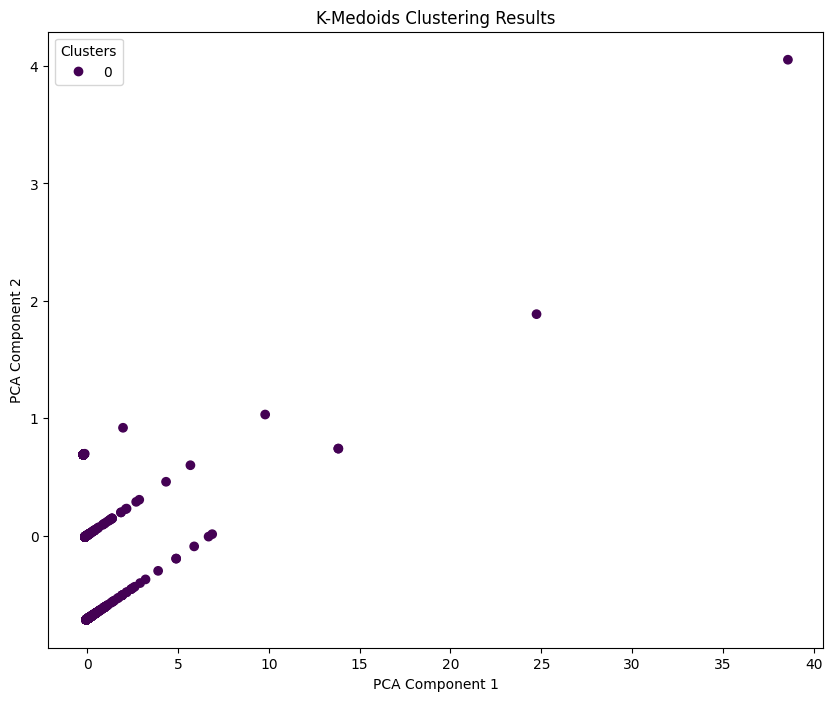

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA

# Load the dataset (assuming 'data' is a pandas DataFrame containing your dataset)
data = pd.read_csv('/content/data_discretized.csv')

# One-hot encode the 'InvestmentnType' categorical variable
onehot_encoder = OneHotEncoder()
investment_type_encoded = onehot_encoder.fit_transform(data[['InvestmentnType']]).toarray()

# Combine the numerical and new one-hot encoded features into a single dataset
numerical_features = data[['Normalized Amount in USD']].values
combined_features = np.hstack((numerical_features, investment_type_encoded))

# Perform K-Medoids clustering
kmedoids = KMedoids(n_clusters=3, random_state=42)
kmedoids.fit(combined_features)

# Add cluster labels to your DataFrame
data['Cluster'] = kmedoids.labels_

# Calculate statistics for each cluster
cluster_stats = data.groupby('Cluster').agg(['mean', 'median', 'std'])

print(cluster_stats)

# For visualization, reduce dimensions to 2D using PCA for the combined feature set
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_features)

# Plot the results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', label=data['Cluster'])
plt.title('K-Medoids Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')
data.dropna(subset=['Normalized Amount in USD', 'YearMonth'], inplace=True)

# Convert 'Date dd/mm/yyyy' to datetime
data['Date'] = pd.to_datetime(data['Date dd/mm/yyyy'], errors='coerce')

# Extract the year and month (or any other temporal feature you're interested in)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

# Create a new column that combines year and month into a single numerical value
# For example, 'YearMonth' could be 'Year' * 12 + 'Month' to get a unique number for each month
data['YearMonth'] = (data['Year'] - data['Year'].min()) * 12 + data['Month']

# Select 'Normalized Amount in USD' and the 'YearMonth' for K-Means clustering
features = data[['Normalized Amount in USD', 'YearMonth']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
# Drop rows with any NaN values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Fit the K-Means model using the optimal number of clusters (determined from the elbow plot)
# Replace 'optimal_k' with the actual number obtained from the elbow method
optimal_k = 4  # Example, change according to your elbow plot
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(features_scaled)

# Calculate cluster statistics
cluster_stats = data.groupby('Cluster_Labels').mean().reset_index()

print("Cluster Statistics:")
print(cluster_stats)

# Visualizing the clusters (using the scaled features for simplicity)
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster_Labels'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering with Normalized Amount in USD and Date')
plt.xlabel('Normalized Amount in USD (scaled)')
plt.ylabel('Date (YearMonth, scaled)')
plt.legend()
plt.show()

# Save the dataframe with cluster labels to a new CSV file
# data.to_csv('/content/data_with_kmeans_clusters.csv', index=False)


KeyError: ignored

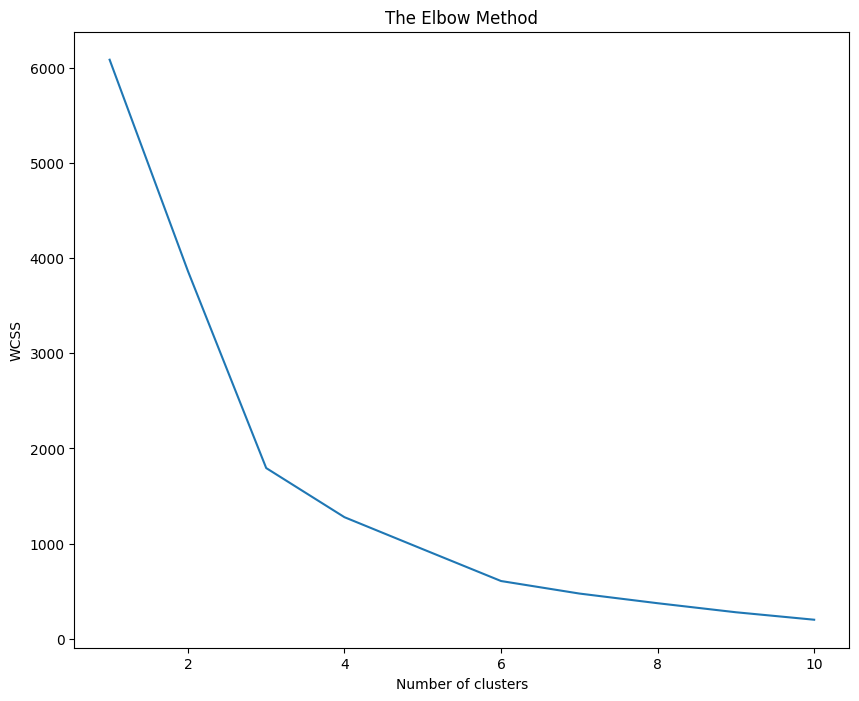

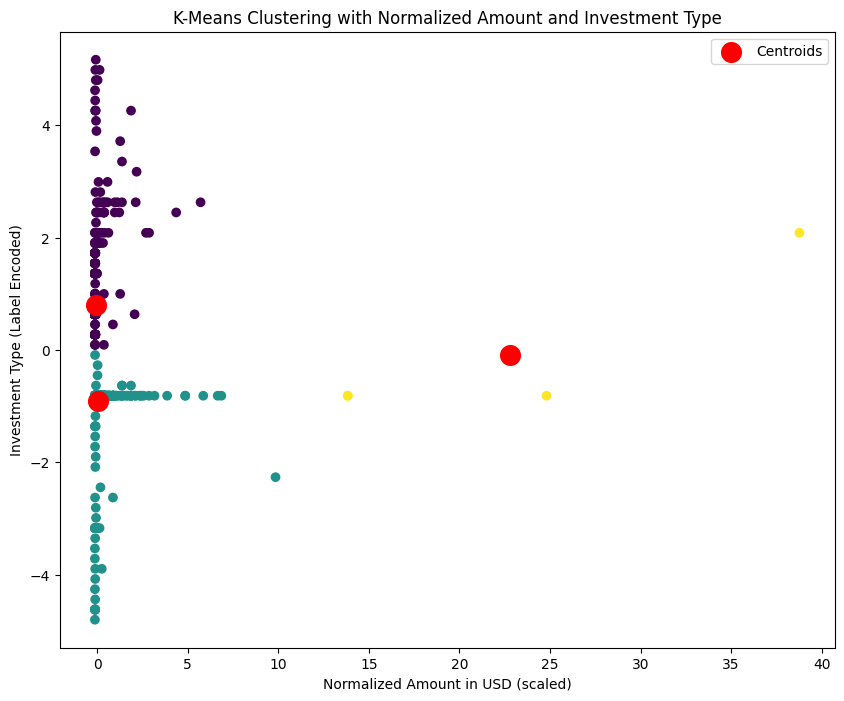

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# Apply label encoding to the 'InvestmentnType' categorical column
label_encoder = LabelEncoder()
data['InvestmentnType_Encoded'] = label_encoder.fit_transform(data['InvestmentnType'])

# Select 'Normalized Amount in USD' and the label-encoded 'InvestmentnType' for K-Means clustering
features = data[['Normalized Amount in USD', 'InvestmentnType_Encoded']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters from the elbow plot
# Let's assume the optimal number is 3 for this example
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(features_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=data['Cluster_Labels'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-Means Clustering with Normalized Amount and Investment Type')
plt.xlabel('Normalized Amount in USD (scaled)')
plt.ylabel('Investment Type (Label Encoded)')
plt.legend()
plt.show()

# Save the dataframe with cluster labels
# data.to_csv('/content/data_with_kmeans_clusters.csv', index=False)


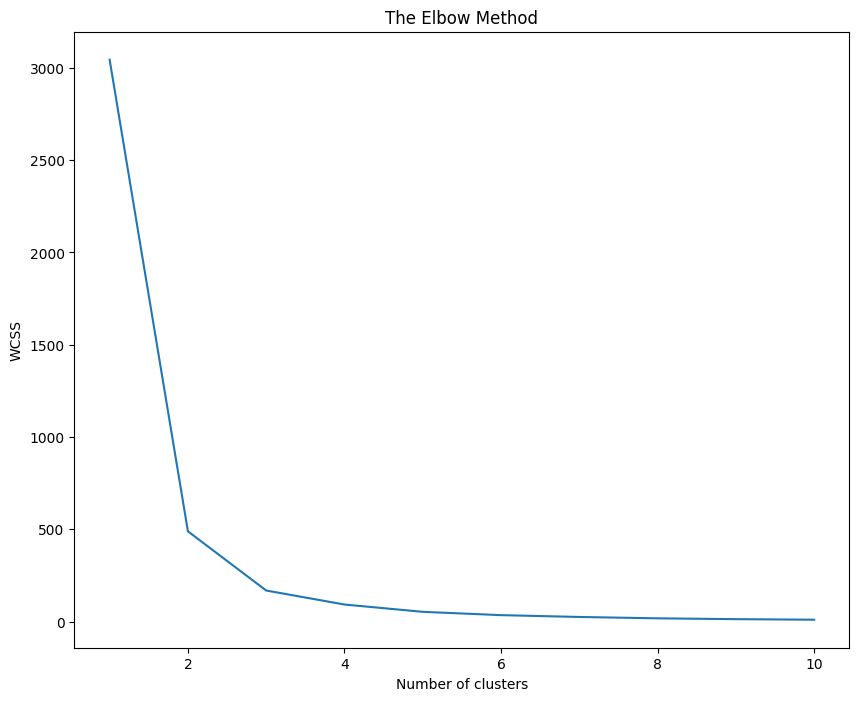

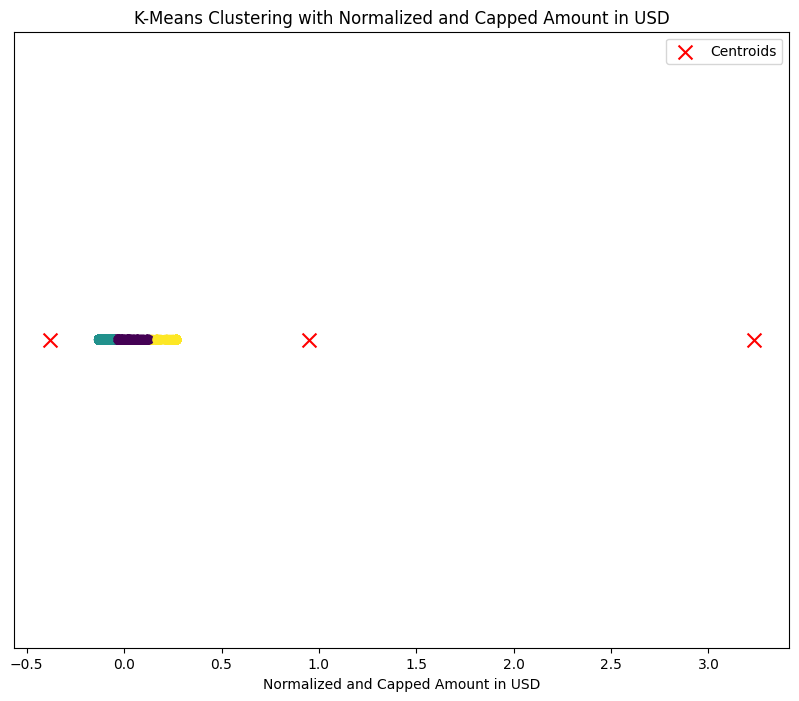

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# Assuming 'Normalized Amount in USD' might contain outliers, cap the values at a certain threshold
# This threshold can be set as a specific percentile of the data
threshold = data['Normalized Amount in USD'].quantile(0.95)
data['Capped Amount in USD'] = data['Normalized Amount in USD'].clip(upper=threshold)

# Standardize the 'Capped Amount in USD' feature
scaler = StandardScaler()
amount_scaled = scaler.fit_transform(data[['Capped Amount in USD']])

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(amount_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Choose the optimal number of clusters from the elbow plot
# Let's assume the optimal number is 3 for this example
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(amount_scaled)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data['Capped Amount in USD'], [0] * len(data), c=data['Cluster_Labels'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], [0] * optimal_clusters, c='red', s=100, marker='x', label='Centroids')
plt.title('K-Means Clustering with Normalized and Capped Amount in USD')
plt.xlabel('Normalized and Capped Amount in USD')
plt.yticks([])  # Hide y-axis ticks as they are not meaningful in this one-dimensional scatter plot
plt.legend()
plt.show()

# Save the dataframe with cluster labels
data.to_csv('/content/data_with_kmeans_clusters.csv', index=False)


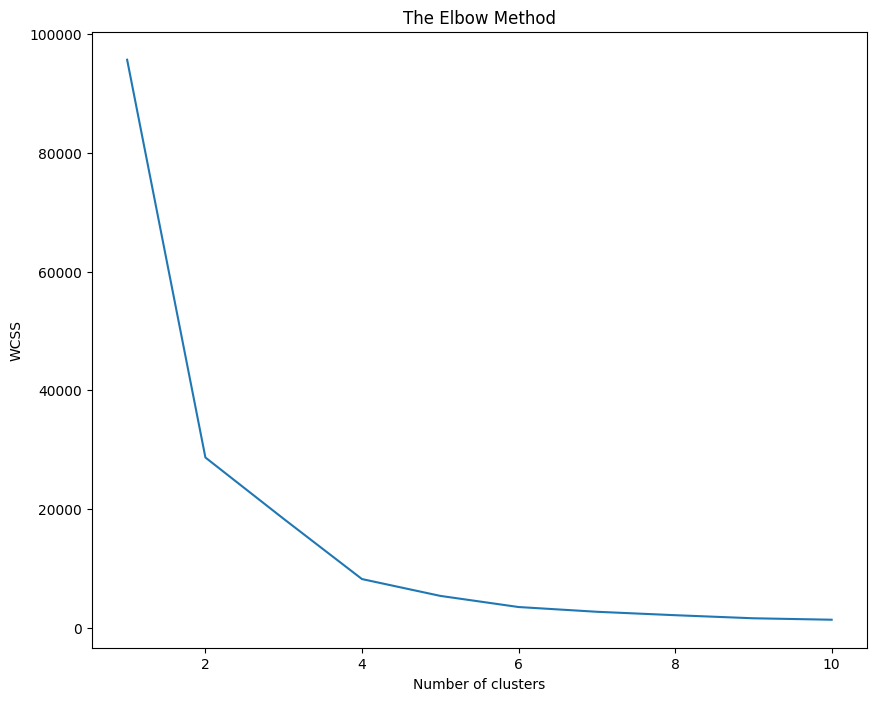

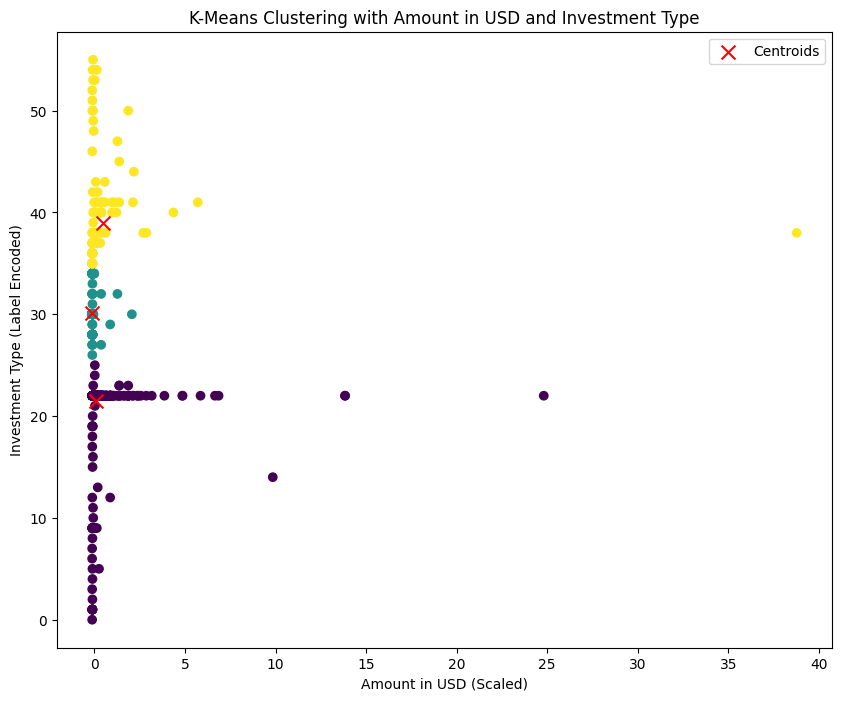

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/data_discretized.csv')

# Apply label encoding to the 'InvestmentnType' categorical variable
label_encoder = LabelEncoder()
data['InvestmentnType_Encoded'] = label_encoder.fit_transform(data['InvestmentnType'])

# Standardize the 'Amount in USD' feature
scaler = StandardScaler()
data['Amount in USD Scaled'] = scaler.fit_transform(data[['Amount in USD']].values.reshape(-1, 1))

# Prepare the features for K-Means clustering
features = data[['Amount in USD Scaled', 'InvestmentnType_Encoded']].values

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to find the elbow point
plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Fit the K-Means model using the optimal number of clusters (determined from the elbow plot)
optimal_clusters = 3  # Replace with the actual number from the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
data['Cluster_Labels'] = kmeans.fit_predict(features)

# Visualizing the clusters
plt.figure(figsize=(10, 8))
plt.scatter(data['Amount in USD Scaled'], data['InvestmentnType_Encoded'], c=data['Cluster_Labels'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='x', label='Centroids')
plt.title('K-Means Clustering with Amount in USD and Investment Type')
plt.xlabel('Amount in USD (Scaled)')
plt.ylabel('Investment Type (Label Encoded)')
plt.legend()
plt.show()

# Save the dataframe with cluster labels
data.to_csv('/content/data_with_kmeans_clusters.csv', index=False)
